# Turbulent Mixing Layer Example
This is an example of using the Turbulent Mixing Layer flow
A two-dimensional flow is initialized with flow on the bottom and simulated. Afterwards, the energy and the velocity field is plotted.

In [1]:
import lettuce as lt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import torch

In [2]:
nmax     = 40000
nconsole = 1000
nreport  = 500
epsilon  = 0.0001 # convergence condition: .01 % relative change

In [3]:
def run_n_plot(Re):
    lattice = lt.Lattice(lt.D2Q9, device = torch.device("cuda"), dtype=torch.float64, use_native=False)
    flow = lt.TurbulentMixing2D(resolution=258, reynolds_number=Re, mach_number=0.1, lattice=lattice)
    collision = lt.KBCCollision2D(lattice, tau=flow.units.relaxation_parameter_lu)
    streaming = lt.StandardStreaming(lattice)
    simulation = lt.Simulation(flow=flow, lattice=lattice, collision=collision, streaming=streaming)

    Energy = lt.IncompressibleKineticEnergy(lattice, flow)
    energy_reporter_internal = lt.ObservableReporter(Energy, interval=nreport, out=None)
    simulation.reporters.append(energy_reporter_internal)
    simulation.reporters.append(lt.ObservableReporter(Energy, interval=nconsole)) # print energy
    simulation.reporters.append(lt.VTKReporter(lattice, flow, interval=nreport, filename_base="./data/turbulence_bothEqPU_258_Re" + "{:.2e}".format(Re) + "/out"))

    simulation.initialize_f_neq()
    energy_new = 0
    mlups = 0
    i_plot = 10
    iterations = int(nmax//nconsole)
    for i in range(iterations):
        energy_old = energy_new
        energy_new = Energy(simulation.f).mean()
        if i%i_plot == 0:
            u_x = flow.units.convert_velocity_to_pu(lattice.u(simulation.f)).cpu().numpy()[0].transpose()
            plt.imshow(u_x, cmap=mpl.colormaps['RdBu'])
            plt.legend()
            plt.show()
        mlups += simulation.step(nconsole)
        if abs((energy_new - energy_old)/energy_new) < epsilon:
            print("CONVERGENCE! Less than ", epsilon*100, " % relative change or nan values")
            break
        if not energy_new == energy_new:
            break
    print("avg MLUPS: ", mlups/iterations)
    return simulation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


steps     time     IncompressibleKineticEnergy
steps     time     IncompressibleKineticEnergy


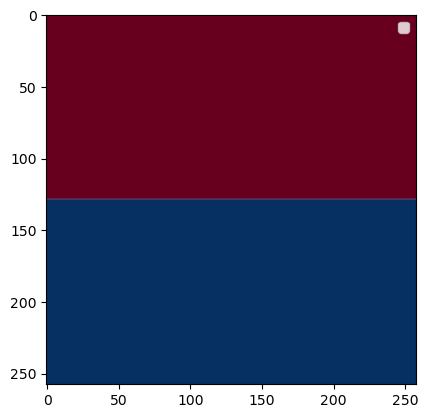

0 0.0 0.2499999999999994


/home/philipp/lettuce/lettuce/simulation.py:122: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/TensorCompare.cpp:493.)
  self.f = torch.where(self.collision.no_collision_mask, self.f, self.collision(self.f))


1000 0.22377917410450618 0.23560436494866252
2000 0.44755834820901236 0.23169896892213485
3000 0.6713375223135185 0.22950878592261617
4000 0.8951166964180247 0.22842945449165686
5000 1.118895870522531 0.22836490530440756
6000 1.342675044627037 0.22907123407115426
7000 1.5664542187315431 0.23008251640311675
8000 1.7902333928360494 0.23104518726744744
9000 2.0140125669405555 0.23179912133978434


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10000 2.237791741045062 0.23231451381938248


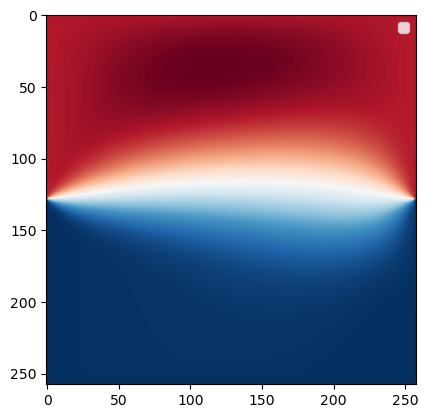

11000 2.4615709151495677 0.2326255668584058
12000 2.685350089254074 0.2327875172990894
13000 2.9091292633585804 0.23285362633150392
14000 3.1329084374630862 0.23286554850533425
15000 3.3566876115675925 0.23285159224148888
CONVERGENCE! Less than  0.01  % relative change or nan values
avg MLUPS:  6.38627059216776


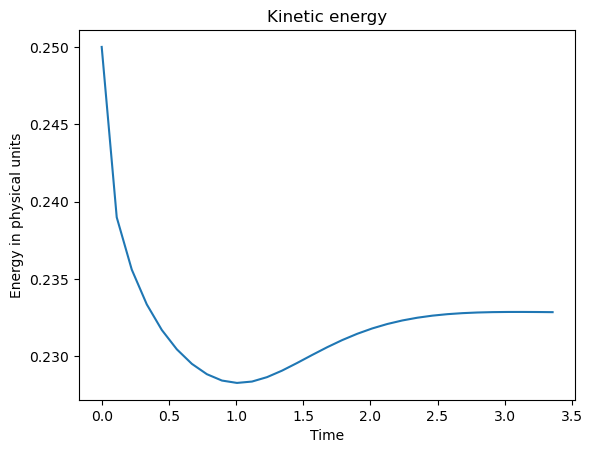

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


steps     time     IncompressibleKineticEnergy
steps     time     IncompressibleKineticEnergy


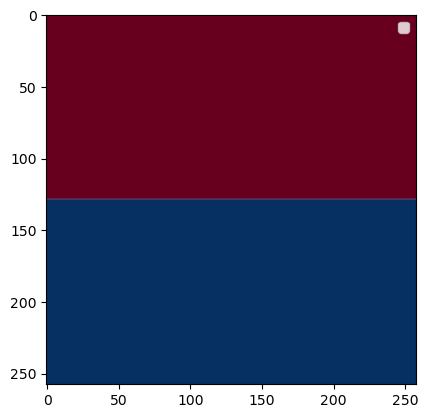

0 0.0 0.2499999999999994
1000 0.22377917410450618 0.24792095786513893
2000 0.44755834820901236 0.2470907546302103
3000 0.6713375223135185 0.24671362365112415
4000 0.8951166964180247 0.24675724214886605
5000 1.118895870522531 0.24714223277194677
6000 1.342675044627037 0.2453976885022484
7000 1.5664542187315431 0.24032858224407821
8000 1.7902333928360494 0.25179903441657386
9000 2.0140125669405555 0.26323679333305566


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10000 2.237791741045062 0.2733763539904765


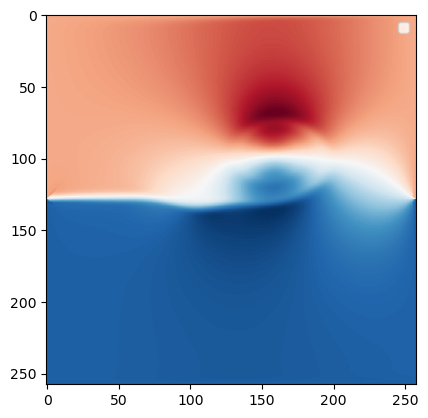

11000 2.4615709151495677 0.28127975617704964
12000 2.685350089254074 0.2850412003536728
13000 2.9091292633585804 0.28182873274706743
14000 3.1329084374630862 0.2802584563941385
15000 3.3566876115675925 0.2734597050971519
16000 3.580466785672099 0.27066821094751603
17000 3.8042459597766047 0.2712801137906279
18000 4.028025133881111 0.27028915341309867
19000 4.251804307985617 0.27569262961586943


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20000 4.475583482090124 0.2782871179855423


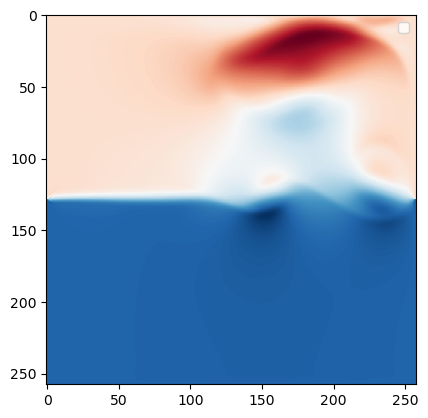

21000 4.69936265619463 0.2774377698628126
22000 4.923141830299135 0.27963107376229
23000 5.146921004403642 0.27789502826905516
24000 5.370700178508148 0.2791388503446807
25000 5.594479352612654 0.2748538833219317
26000 5.818258526717161 0.2742073595104145
27000 6.042037700821667 0.2699771741185579
28000 6.2658168749261725 0.2729201408159667
29000 6.489596049030679 0.2791002785337549


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


30000 6.713375223135185 0.28451875935787263


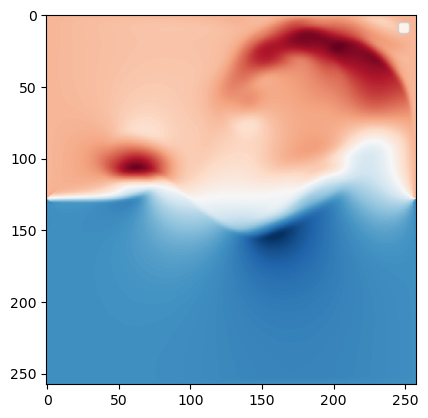

31000 6.937154397239691 0.28414782617201595
32000 7.160933571344198 0.26624250803905714
33000 7.384712745448704 0.26598226116656615
34000 7.6084919195532095 0.2757943395283588
35000 7.832271093657716 0.2878999705293536
36000 8.056050267762222 0.29655396512234955
37000 8.279829441866728 0.29485283611843854
38000 8.503608615971235 0.28728263207929533
39000 8.72738779007574 0.28779061487324176
40000 8.951166964180247 0.2870127994055478
avg MLUPS:  17.034398392873506


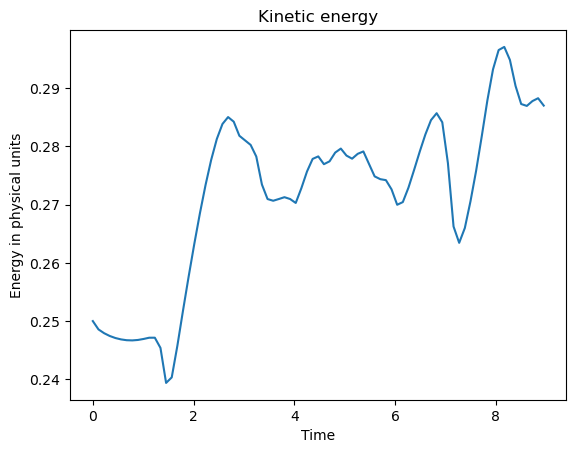

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


steps     time     IncompressibleKineticEnergy
steps     time     IncompressibleKineticEnergy


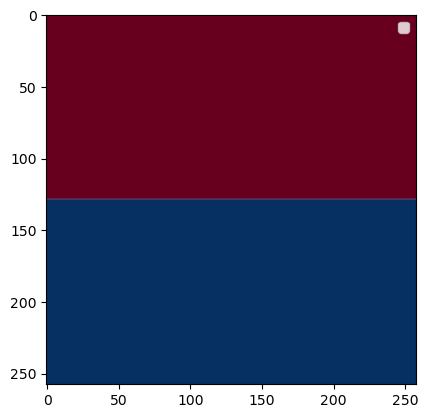

0 0.0 0.2499999999999994
1000 0.22377917410450618 0.2493883212240059
2000 0.44755834820901236 0.24892726003167956
3000 0.6713375223135185 0.24847888447693406
4000 0.8951166964180247 0.25044231825868485
5000 1.118895870522531 0.2501501426339838
6000 1.342675044627037 0.24900452714382604
7000 1.5664542187315431 0.24310166417985937
8000 1.7902333928360494 0.25484560695797875
9000 2.0140125669405555 0.2671525884985851


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10000 2.237791741045062 0.277815408740853


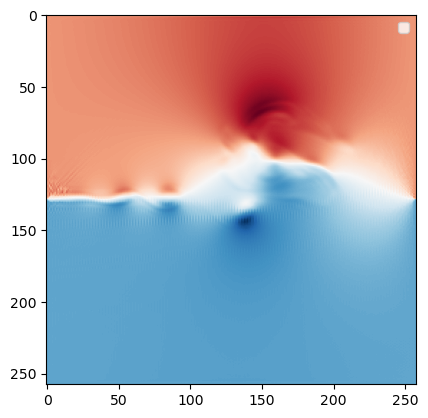

11000 2.4615709151495677 0.28647788895746257
12000 2.685350089254074 0.2905762074582097
13000 2.9091292633585804 0.29035297194673904
14000 3.1329084374630862 0.28515305985225564
15000 3.3566876115675925 0.2789497236609928
16000 3.580466785672099 0.28175414206968397
17000 3.8042459597766047 0.27659973497813084
18000 4.028025133881111 0.2746894033468268
19000 4.251804307985617 0.28124168064516525


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20000 4.475583482090124 0.2910543091648217


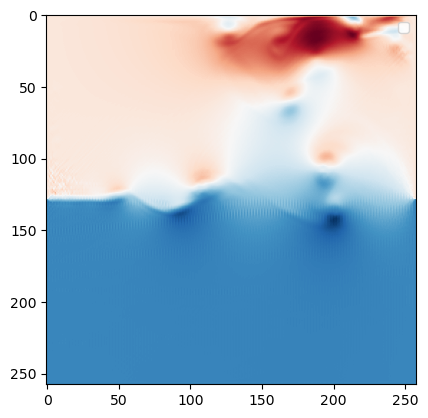

21000 4.69936265619463 0.2912681498741486
22000 4.923141830299135 0.29179251851838084
23000 5.146921004403642 0.295593594892136
24000 5.370700178508148 0.29176055878410284
25000 5.594479352612654 0.2952406391976251
26000 5.818258526717161 nan
27000 6.042037700821667 nan
avg MLUPS:  11.620007206725223


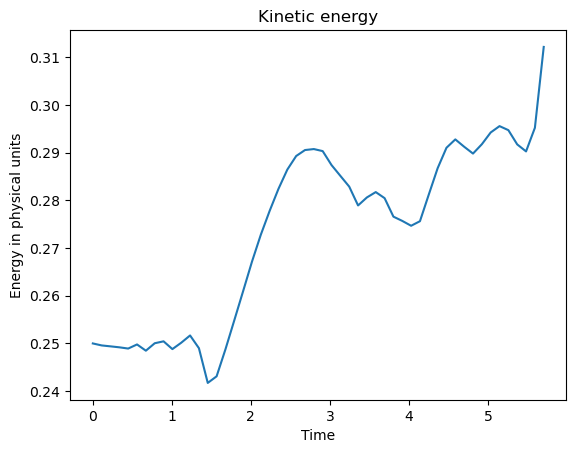

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


steps     time     IncompressibleKineticEnergy
steps     time     IncompressibleKineticEnergy


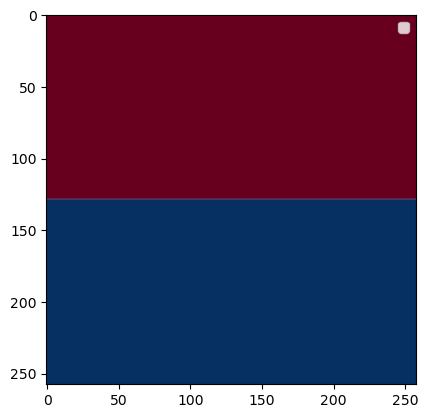

0 0.0 0.2499999999999994
1000 0.22377917410450618 0.24943379468916985
2000 0.44755834820901236 0.24901519390840735
3000 0.6713375223135185 0.2500718989128444
4000 0.8951166964180247 0.24901602544286752
5000 1.118895870522531 0.25140995646455694
6000 1.342675044627037 0.246723216768362
7000 1.5664542187315431 0.2438312659581096
8000 1.7902333928360494 0.2551789344087494
9000 2.0140125669405555 0.26672585957256983


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10000 2.237791741045062 0.278015298613174


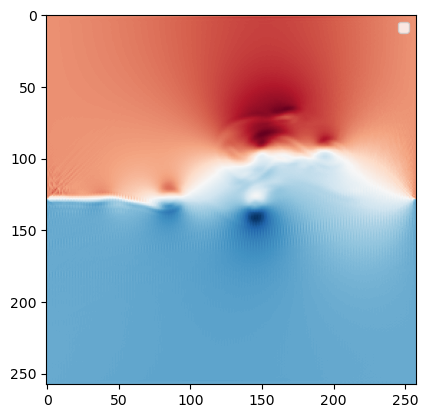

11000 2.4615709151495677 0.2872118566439155
12000 2.685350089254074 0.29312851514085153
13000 2.9091292633585804 0.2935652769604005
14000 3.1329084374630862 0.2833224443963068
15000 3.3566876115675925 0.2828986517567909
16000 3.580466785672099 0.27691597044720495
17000 3.8042459597766047 0.27600712338189476
18000 4.028025133881111 0.2771329308638239
19000 4.251804307985617 0.3039153778187766


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20000 4.475583482090124 nan


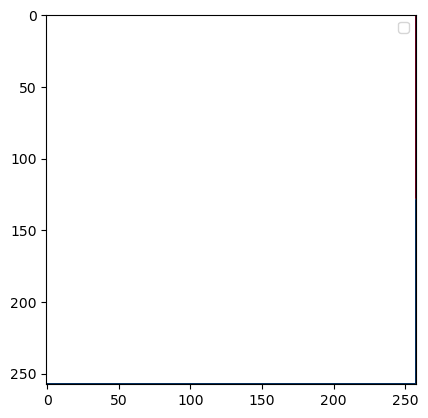

21000 4.69936265619463 nan
avg MLUPS:  8.868406034005949


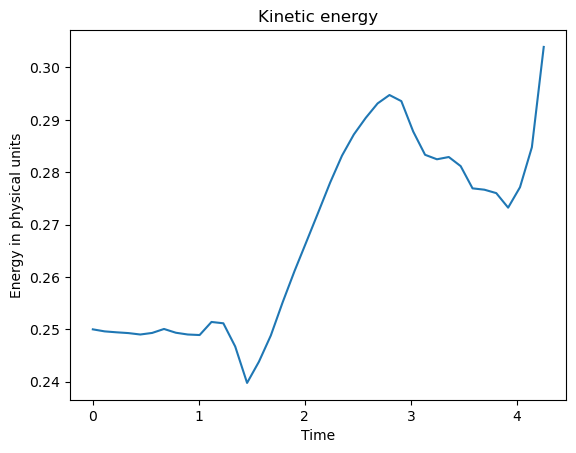

In [4]:
for Re in [100, 1e4, 1e6, 1e7]:
    sim = run_n_plot(Re)
    energy = np.array(sim.reporters[0].out)
    plt.plot(energy[:,1],energy[:,2])
    plt.title('Kinetic energy')
    plt.xlabel('Time')
    plt.ylabel('Energy in physical units')
    plt.show()